## Loan Dataset 

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\91772\\OneDrive\\Desktop\\Loan_default.csv")
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


### Dataset Overview

- **Purpose:** The dataset is used for loan default prediction.
- **Goal:** To analyze financial and demographic details of borrowers and understand patterns that lead to loan defaults.

In [7]:
df.head(10)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


## The dataset contains 255,347 loan records with 19 columns. Key details include:

  - **Loan & Borrower Details:** Loan ID, Age, Income, Loan Amount, Credit Score, Loan Term, and Interest Rate.
  - **Financial Information:** Debt-to-Income (DTI) Ratio, Number of Credit Lines, and Months Employed.
  - **Personal Information:** Education, Employment Type, Marital Status, Mortgage Ownership, and Dependents.
  - **Loan Attributes:** Loan Purpose, Co-Signer Status, and whether the loan defaulted (Default column: 1 = Default, 0 = No Default).

## <span style='color:blue'>Data Exploration</span>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

### Description of Columns

In [14]:

df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


### Column Description

**1.** **LoanID:** Unique identifier for each loan application.

**2.** **Age:** Age of the Borrower (in years).

**3.** **Income:** Monthly income of the borrower (in INR).

**4.** **LoanAmount:** 	Total loan amount requested by the borrower (in INR).

**5.** **CreditScore:** A numerical score (300-850) representing the borrower’s creditworthiness.

**6.** **MonthsEmployed:** Number of months the borrower has been employed.

**7.** **NumCreditLines:** Total number of active credit lines (credit cards, loans, etc.).

**8.** **InterestRate:** Interest rate assigned to the loan (percentage).

**9.** **LoanTerm:** Duration of the loan repayment (in months).

**10.** **DTIRatio:** Debt-to-Income ratio, a measure of how much debt a borrower has compared to their income.

**11.** **Education:** Education level of the borrower (e.g., High School, College, Graduate).

**12.** **EmploymentType:** Type of employment (e.g., Full-Time, Part-Time, Self-Employed).

**13.** **MaritalStatus:** Borrower's marital status (Married/Unmarried).

**14.** **HasMortgage:** Indicates whether the borrower has an existing mortgage (Yes/No).

**15.** **HasDependents:** Indicates whether the borrower has dependents (children or other financial dependents) (Yes/No).

**16.** **LoanPurpose:** Purpose for taking the loan (e.g., Debt Consolidation, Business, Education).

**17.** **HasCoSigner:** Indicates if the loan has a co-signer (Yes/No).

**18.** **Default:** Target variable: 0 = No Default (loan repaid), 1 = Default (loan not repaid).
                        

### - **Possible Data Analysis Goals:**
- **1.	Loan Default Prediction:**
  - **Identify factors influencing loan defaults**
  - **Goal: Identify key factors that lead borrowers to default on their loans.**
  - **Why it matters? Helps financial institutions reduce loan risks by identifying high-risk borrowers.**
      
- **2.	Credit Risk Assessment:** 
  -**Find patterns in borrower characteristics that impact credit risk.**
  - **Goal: Understand borrower characteristics that impact the likelihood of repayment.**
  - **Why it matters? Helps banks determine loan eligibility and interest rates.**

  
- **3.	Interest Rate Analysis:**
  - **Understand how credit score and income affect interest rates.**
  - **Goal: Determine how factors like CreditScore and Income affect Interest Rates.**
  - **Why it matters? Helps banks optimize interest rates based on borrower profiles.**

  
- **4.	Debt-to-Income Ratio Study:**
  - **Analyze the relationship between DTI and loan approval.**
  - **Goal: Analyze how the DTI Ratio (Debt-to-Income) affects loan approval and repayment.**
  - **Why it matters? High DTI means the borrower has more financial obligations, increasing default risk.**

  
- **5.	Loan Approval Trends:**
  - **Examine loan amount distribution across income and employment levels.**
  - **Goal: Examine Loan Amount distribution across Income, Employment Type, and Credit Score.**
  - **Why it matters? Helps financial institutions adjust loan policies based on borrower profiles.**

**Observation:**

**Age:**

- The average age is around 43 yrs.
- The age ranges from 18 to 69 yrs.
- The age distribution has a standard deviation of 14.99.

**Income:**

- The average income is 82499.30 INR.
- The income ranges from 15000 to 149999 INR.

**LoanAmount:**

- The average LoanAmount is around 127578.86 INR.
- The LoanAmount ranges from 5000 to 249999 INR.

**CreditScore:**

- The average CreditScore is around 574.
- The CreditScore ranges from 300 to 849.

In [20]:
df.duplicated().sum()    # There are no duplicates

0

Handling Duplicates: Duplicate rows (if any) are removed.

In [23]:
df.isnull().sum()     # There are no null values

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [25]:
# Checking for Missing Values: Any empty cells in the dataset are identified.

## Correlation plot of numeric columns

In [28]:
num_df = df.select_dtypes(include=['int64','float32']).corr()    # identify the numerical column
num_df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,LoanTerm,Default
Age,1.000000,-0.001244,-0.002213,-0.000548,-0.000341,-0.000890,0.000263,-0.167783
Income,-0.001244,1.000000,-0.000865,-0.001430,0.002675,-0.002016,-0.000998,-0.099119
LoanAmount,-0.002213,-0.000865,1.000000,0.001261,0.002817,0.000794,0.002538,0.086659
CreditScore,-0.000548,-0.001430,0.001261,1.000000,0.000613,0.000016,0.001130,-0.034166
MonthsEmployed,-0.000341,0.002675,0.002817,0.000613,1.000000,0.001267,-0.001166,-0.097374
NumCreditLines,-0.000890,-0.002016,0.000794,0.000016,0.001267,1.000000,-0.000226,0.028330
LoanTerm,0.000263,-0.000998,0.002538,0.001130,-0.001166,-0.000226,1.000000,0.000545
Default,-0.167783,-0.099119,0.086659,-0.034166,-0.097374,0.028330,0.000545,1.000000


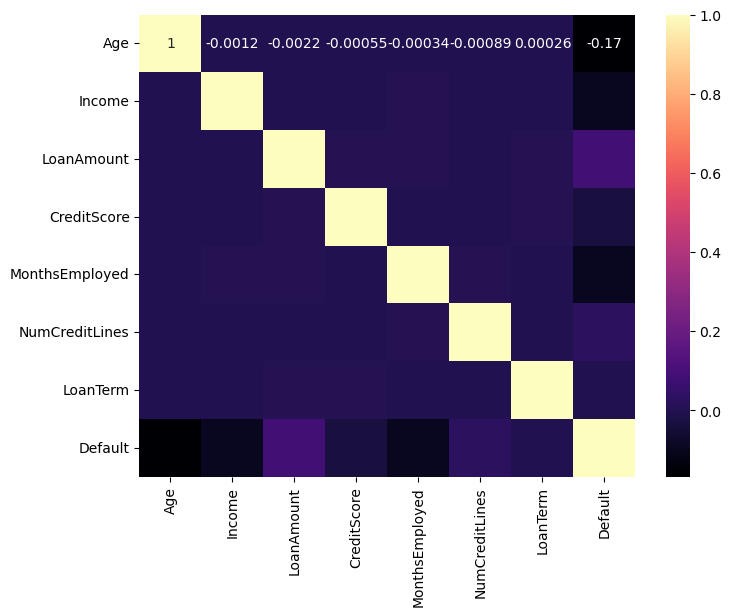

In [30]:
# Creating heatmap of the correlation matrix

plt.figure(figsize=(8,6))
sns.heatmap(num_df,annot=True,cmap='magma')
plt.show()

#### <span style='color:red'>Observation</span>

- **Purpose:** Shows how different numerical variables are related.
- **Insights:**
Credit Score is negatively correlated with Default (i.e., lower scores = higher default rate).
Debt-to-Income Ratio has a positive correlation with Default.

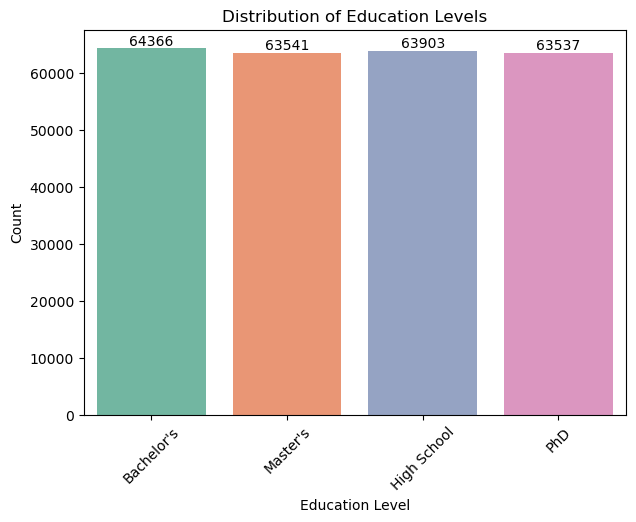

In [34]:
plt.figure(figsize=(7, 5))

A = sns.countplot(x=df["Education"], palette="Set2")
for i in A.containers:
    A.bar_label(i)
    
plt.title("Distribution of Education Levels")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### <span style='color:red'>Observation</span>

## Education Level Distribution (Bar Chart)
- **Purpose:** Shows the number of borrowers based on education level.
- **Insights:**
Most borrowers have a college degree.
Borrowers with lower education levels might have different default risks.

## Loan Default Distribution

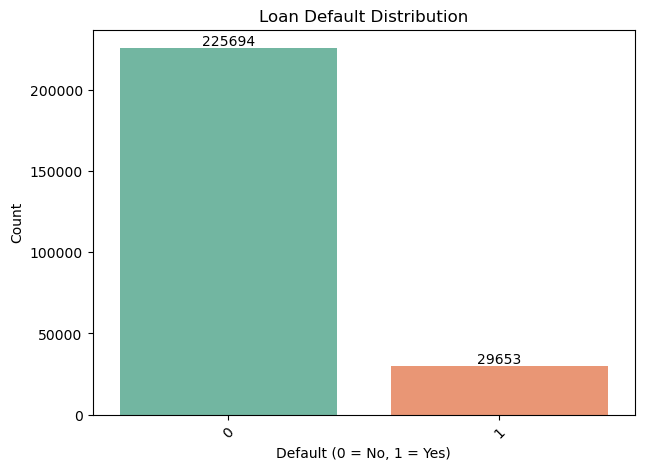

In [39]:
plt.figure(figsize=(7, 5))

A = sns.countplot(x=df["Default"], palette="Set2")
for i in A.containers:
    A.bar_label(i)
    
plt.title("Loan Default Distribution")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### <span style='color:red'>Observation</span>

## Loan Default Distribution (Bar Chart)
- **Purpose:** Shows how many loans defaulted vs. didn’t default.
- **Insights:**
Majority of loans did not default.
Helps in understanding the imbalance in default cases.

## Distribution of Marital Status

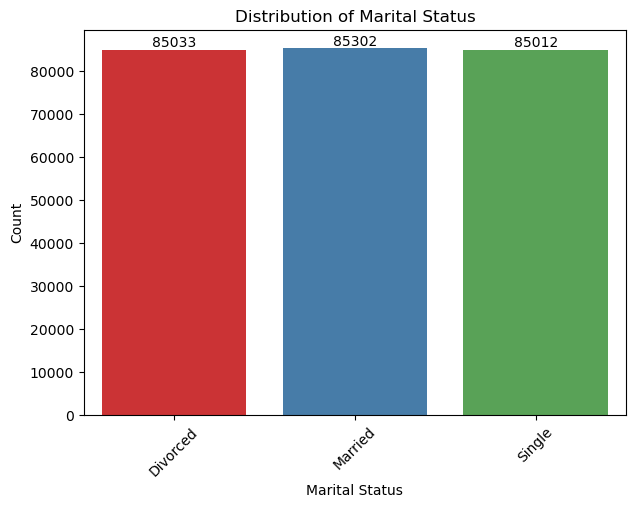

In [44]:
plt.figure(figsize=(7, 5))

A = sns.countplot(x=df["MaritalStatus"], palette="Set1")
for i in A.containers:
    A.bar_label(i)
    
plt.title("Distribution of Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### <span style='color:red'>Observation</span>

## Marital Status Distribution (Bar Chart)
- **Purpose:** Shows the number of married vs. unmarried borrowers.
- **Insights:**
More married borrowers apply for loans.
Default rates can be compared based on marital status.

## Distribution of Loan Purpose

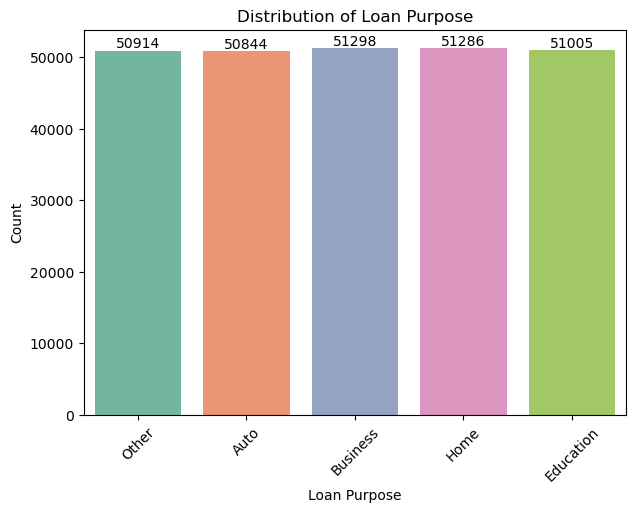

In [49]:
plt.figure(figsize=(7, 5))

A = sns.countplot(x=df["LoanPurpose"], palette="Set2")
for i in A.containers:
    A.bar_label(i)
    
plt.title("Distribution of Loan Purpose")
plt.xlabel("Loan Purpose")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### <span style='color:red'>Observation</span>

## Loan Purpose Distribution (Bar Chart)
- **Purpose:** Shows why borrowers took loans (Auto, Business, Personal, etc.).
- **Insights:**
The most common reason for loans is Debt Consolidation.
Business loans might have higher risk.

## Histogram of CreditScore

C:\Users\91772\anaconda3\anaconda1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


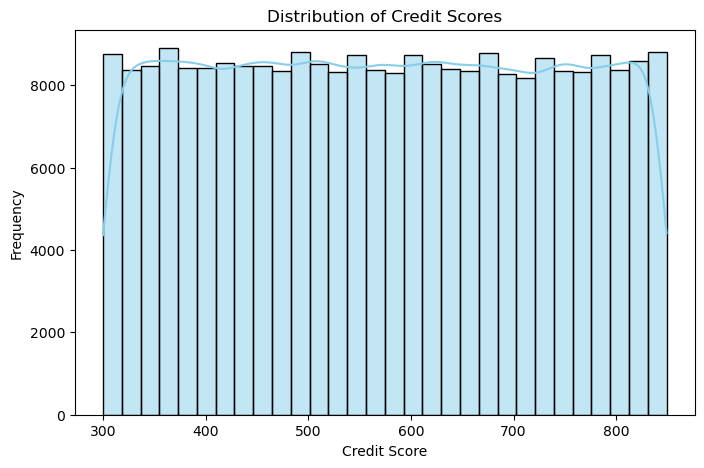

In [54]:
plt.figure(figsize=(8, 5))
sns.histplot(df['CreditScore'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Credit Scores")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.show()

#### <span style='color:red'>Observation</span>

## Credit Score Distribution (Histogram)
- **Purpose:** Shows how credit scores are spread.
- **Insights:**
Most borrowers have a mid-range credit score (around 600-700).
Very low credit scores might indicate higher default risk.



## Scatterplot of Marital Status vs Credit Score

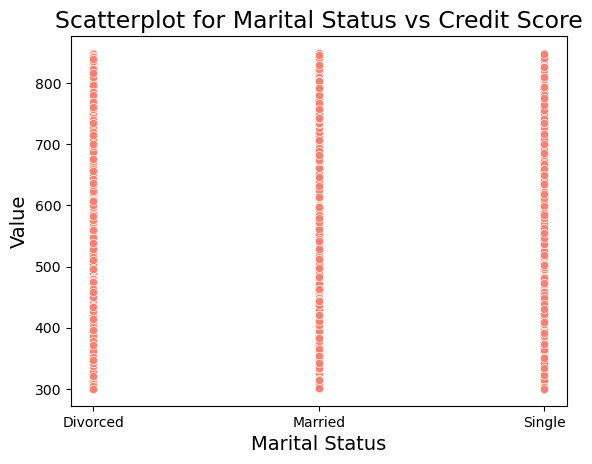

In [59]:
sns.scatterplot(data=df,x='MaritalStatus',y='CreditScore',color='salmon')
plt.xlabel('Marital Status',fontsize=14)
plt.ylabel('Value',fontsize=14)
plt.title('Scatterplot for Marital Status vs Credit Score',fontsize=17)
plt.show()

#### <span style='color:red'>Observation</span>

## Scatterplot (Marital Status vs. Credit Score)
- **Purpose:** Examines how marital status affects credit scores.
- **Insights:**
Some differences in credit scores based on marital status.

## Countplot of Loan Term Distribution

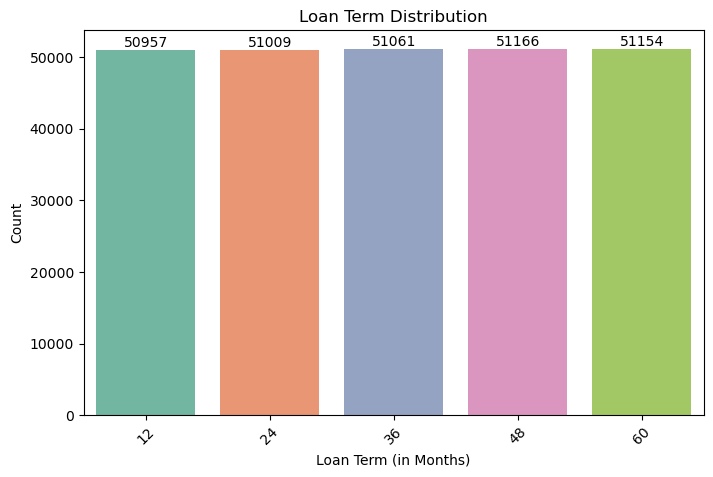

In [64]:
plt.figure(figsize=(8, 5))
A= sns.countplot(x=df["LoanTerm"], palette="Set2")

for i in A.containers:
    A.bar_label(i)

plt.title("Loan Term Distribution")
plt.xlabel("Loan Term (in Months)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### <span style='color:red'>Observation</span>

## Loan Term Distribution (Bar Chart)
- **Purpose:** Shows the distribution of loan repayment durations.
- **Insights:**
Most loans have a shorter term (e.g., 24, 36, or 60 months).
Longer-term loans might have higher interest rates.


## Conclusion & Key Takeaways
**High-risk borrowers tend to have:**
- Low credit scores.
- High debt-to-income ratios.
- Unstable employment.
- Loan term & interest rates influence repayment behavior.
- Financial institutions should screen borrowers based on these insights.

## Preprocessing Steps

### ML-Part

In [71]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


### Checking Skewness

In [74]:
df[['Age','Income','LoanAmount','CreditScore','MonthsEmployed','NumCreditLines','InterestRate','LoanTerm','DTIRatio','Default']].skew()

Age               0.000698
Income           -0.000381
LoanAmount       -0.001827
CreditScore       0.004688
MonthsEmployed   -0.002142
NumCreditLines   -0.000278
InterestRate      0.004608
LoanTerm         -0.002178
DTIRatio         -0.001499
Default           2.396377
dtype: float64

### Checking Outliers

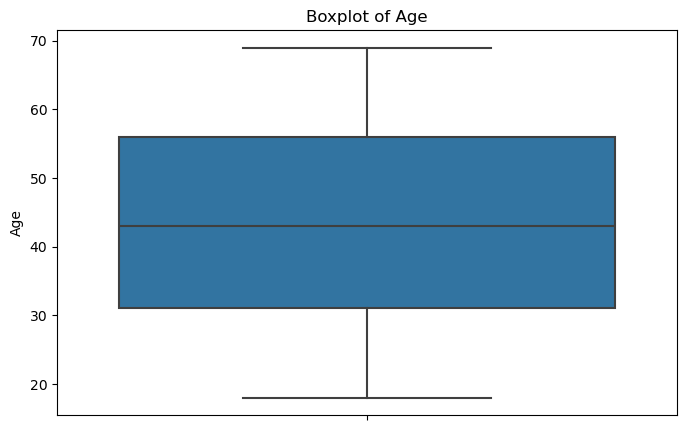

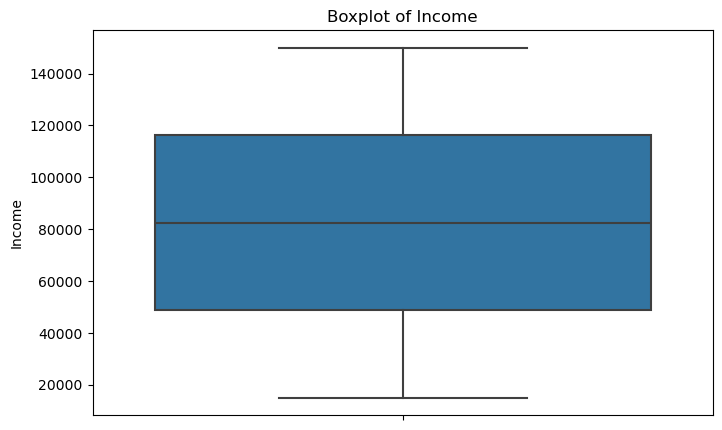

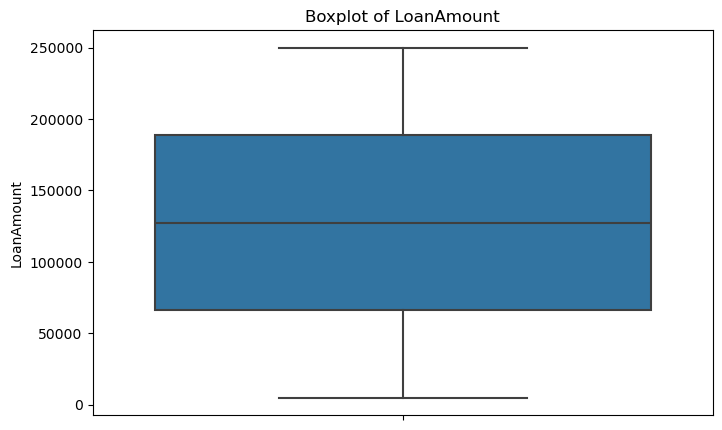

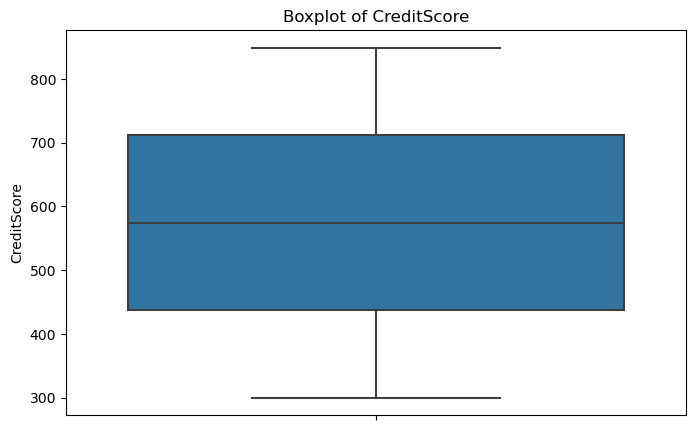

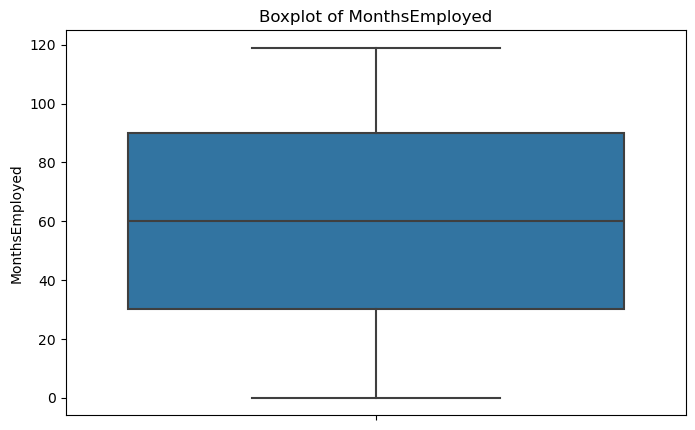

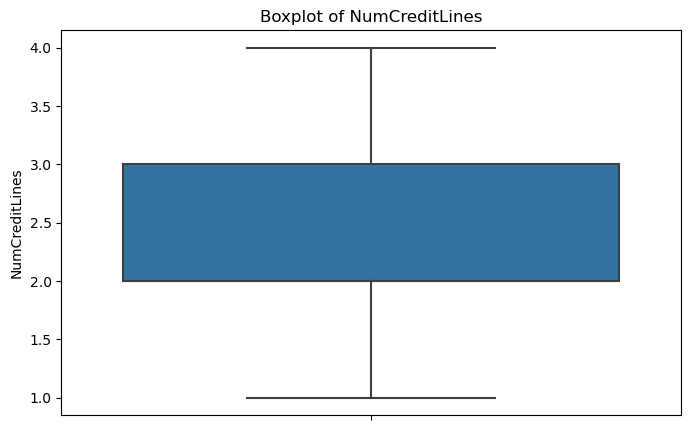

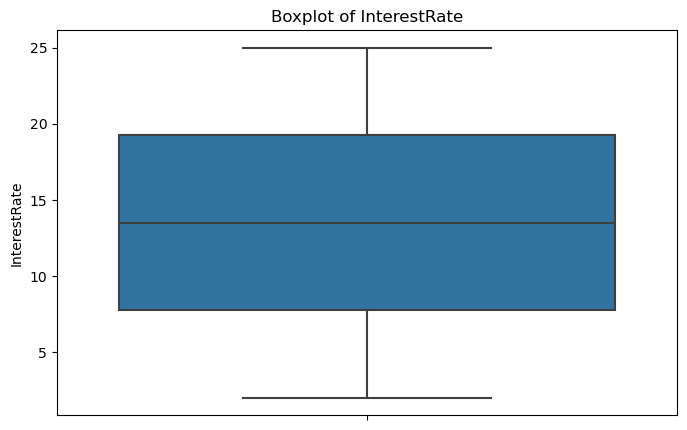

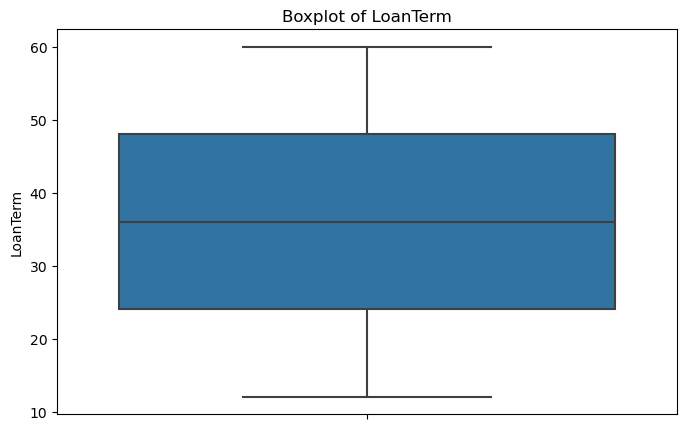

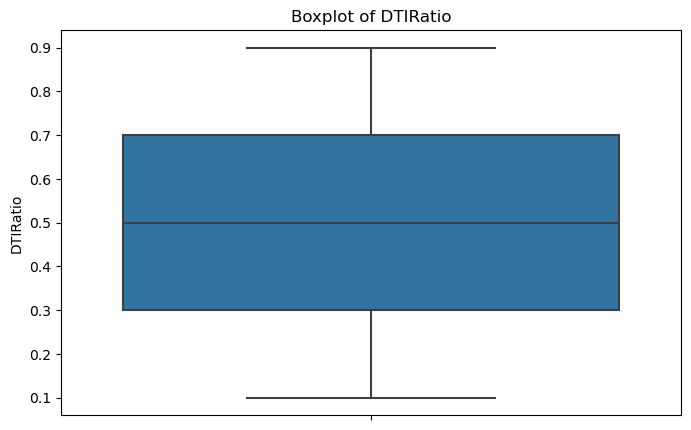

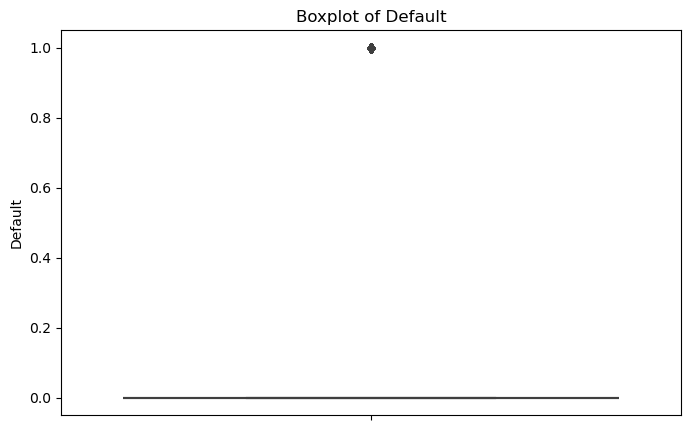

In [77]:
num_col = ['Age','Income','LoanAmount','CreditScore','MonthsEmployed','NumCreditLines','InterestRate','LoanTerm','DTIRatio','Default']
for i in num_col:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df,y=i)
    plt.title(f"Boxplot of {i}")
    plt.ylabel(i)

# There are no outliers present in the dataset

##### Outliers
- **Definition:** Outliers are extreme values that deviate significantly from the rest of the data.

How to Detect Outliers?
- Boxplots → Identify values outside the whiskers.
- Z-score → If a value is more than 3 standard deviations from the mean.
- IQR (Interquartile Range) Method →
Anything below Q1 - 1.5×IQR or above Q3 + 1.5×IQR is an outlier.

### Converting the Categorical column to Numerical`

In [81]:
df.drop('LoanID', axis=1, inplace=True)

In [83]:
categorical_cols = df.select_dtypes(include=['object','category']).columns
categorical_cols

Index(['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')

In [85]:
from sklearn.preprocessing import LabelEncoder

In [86]:
LE = LabelEncoder()
for i in categorical_cols:
    df[i] = LE.fit_transform(df[i])

In [89]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0


In [91]:
df.shape

(255347, 17)

### Training and Testing

##### Train and Test Split in This Data
- **Purpose:**

- The dataset is likely used for loan default prediction (classification problem).
- We split the data into training and testing sets to train a model and evaluate its performance.


In [95]:
x = df.drop('Default',axis=1)
x

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,0,0,1,0,0,4,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,1,1,0,0,0,3,0
255344,56,84820,208294,597,70,3,5.29,60,0.50,1,2,1,1,1,0,1
255345,42,85109,60575,809,40,1,20.90,48,0.44,1,1,2,1,1,4,0


In [97]:
y = df['Default']
y

0         0
1         0
2         1
3         0
4         0
         ..
255342    0
255343    1
255344    0
255345    0
255346    0
Name: Default, Length: 255347, dtype: int64

In [99]:
# importing library

from sklearn.model_selection import train_test_split

In [101]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## <span style='color:blue'>Logistic Regression</span>

In [104]:
# importing library
from sklearn.linear_model import LogisticRegression

In [106]:
LR = LogisticRegression()
LR

LogisticRegression()

In [108]:
LR.fit(x_train,y_train)

C:\Users\91772\anaconda3\anaconda1\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### <span style='color:purple'>Model Prediction</span>

In [111]:
y_pred = LR.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

- **prediction:-** classify new data, evaluate performance, and make real-world decisions based on the trained model.

In [114]:
y_test

51139     0
71005     0
35684     0
174087    0
137952    0
         ..
35991     0
69680     0
184743    0
209406    0
123164    0
Name: Default, Length: 51070, dtype: int64

In [116]:
error = y_test - y_pred
error

51139     0
71005     0
35684     0
174087    0
137952    0
         ..
35991     0
69680     0
184743    0
209406    0
123164    0
Name: Default, Length: 51070, dtype: int64

#### Training Score

In [119]:
LR.score(x_train,y_train)

0.883795043005331

#### Testing Score

In [122]:
LR.score(x_test,y_test)

0.88455061680047

### Accuracy of Model

In [125]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [127]:
acc = accuracy_score(y_pred,y_test)
print(f"Accuracy of model using Logistic Regression is {acc}")

Accuracy of model using Logistic Regression is 0.88455061680047


In [129]:
print('Confusion Matrix')
confusion_matrix(y_test,y_pred)

Confusion Matrix


array([[45169,     1],
       [ 5895,     5]], dtype=int64)

In [131]:
print('Classification Report')
print(classification_report(y_pred,y_test))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.88      0.94     51064
           1       0.00      0.83      0.00         6

    accuracy                           0.88     51070
   macro avg       0.50      0.86      0.47     51070
weighted avg       1.00      0.88      0.94     51070



#### <span style='color:red'>Observation</span>

- **Output:-**
Probability of default & binary classification (0 or 1)
- **Strengths:-**
Simple, interpretable, works well with linear data
- **Weaknesses:-**
Assumes linear relationships, not effective for complex patterns
- **Training Score:-**
0.8838244148876281
- **Testing Score:-**
0.8845114548658704
- **Accuracy:-**
0.88

## <span style='color:blue'>KNN Classifier</span>

In [136]:
from sklearn.neighbors import KNeighborsClassifier

In [138]:
KNN = KNeighborsClassifier()
KNN

KNeighborsClassifier()

In [140]:
KNN.fit(x_train,y_train)

KNeighborsClassifier()

#### <span style='color:purple'>Model Prediction</span>`

In [143]:
y_pred - KNN.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [144]:
y_test

51139     0
71005     0
35684     0
174087    0
137952    0
         ..
35991     0
69680     0
184743    0
209406    0
123164    0
Name: Default, Length: 51070, dtype: int64

#### Training Score

In [146]:
KNN.score(x_train,y_train)

0.8894589209749507

### Testing Score

In [148]:
KNN.score(x_test,y_pred)

0.9775602114744468

### Accuracy of Model

In [152]:
acc = accuracy_score(y_pred,y_test)
print(f"Accuracy of model using KNN Classifier is {acc}")

Accuracy of model using KNN Classifier is 0.88455061680047


In [153]:
print('Confusion Matrix')
confusion_matrix(y_test,y_pred)

Confusion Matrix


array([[45169,     1],
       [ 5895,     5]], dtype=int64)

In [158]:
print('Classification Report')
print(classification_report(y_pred,y_test))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.88      0.94     51064
           1       0.00      0.83      0.00         6

    accuracy                           0.88     51070
   macro avg       0.50      0.86      0.47     51070
weighted avg       1.00      0.88      0.94     51070



#### <span style='color:red'>Observation</span>

- **Output:-**
Classification based on nearest neighbors
- **Strengths:-**
No training required, works well with small datasets
- **Weaknesses:-**
Slow for large datasets, sensitive to irrelevant features
- **Training Score:-**
0.8893267475046138
- **Testing Score:-**
0.9771294301938516
- **Accuracy:-**
0.88

## <span style='color:blue'>Decision Tree Classifier</span>

In [163]:
# importing library

from sklearn.tree import DecisionTreeClassifier

In [165]:
DT = DecisionTreeClassifier()
DT

DecisionTreeClassifier()

In [167]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

#### <span style='color:purple'>Model Prediction</span>

In [170]:
y_pred = DT.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [172]:
y_test

51139     0
71005     0
35684     0
174087    0
137952    0
         ..
35991     0
69680     0
184743    0
209406    0
123164    0
Name: Default, Length: 51070, dtype: int64

#### Training Score

In [175]:
DT.score(x_train,y_train)

1.0

#### Testing Score

In [178]:
DT.score(x_test,y_pred)

1.0

### Accuracy of Model

In [181]:
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.804092422165655
Confusion Matrix:
[[39643  5527]
 [ 4478  1422]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     45170
           1       0.20      0.24      0.22      5900

    accuracy                           0.80     51070
   macro avg       0.55      0.56      0.55     51070
weighted avg       0.82      0.80      0.81     51070



#### <span style='color:red'>Observation</span>

- **Output:-**
Tree-based classification & feature importance
- **Strengths:-**
Captures non-linear relationships, interpretable
- **Weaknesses:-**
Prone to overfitting, sensitive to noise
- **Training Score:-**
1.0
- **Testing Score:-**
1.0
- **Accuracy:-**
0.80

In [185]:
from sklearn import tree

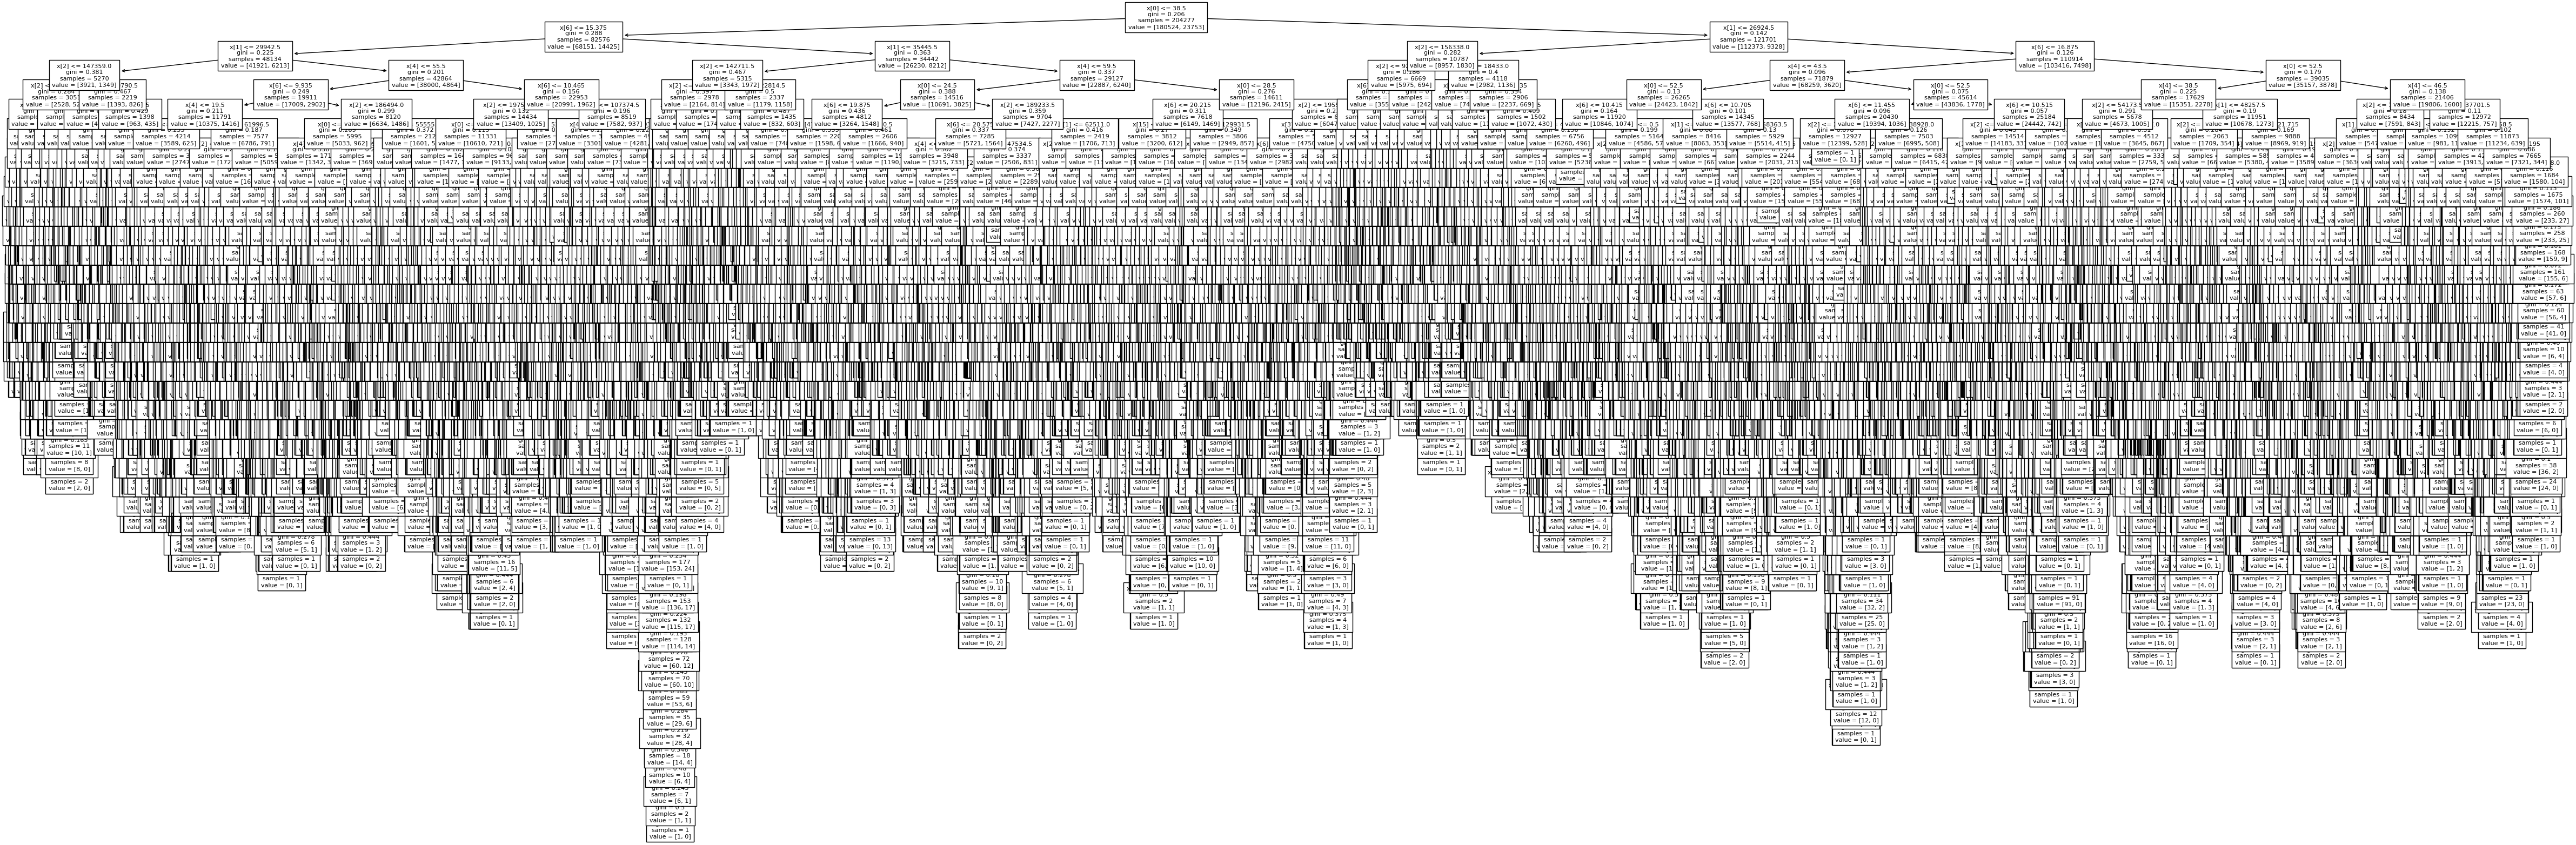

In [189]:
plt.figure(figsize=(60,20))
tree.plot_tree(DT,fontsize = 8)
plt.show()

## <span style='color:blue'>Random Forest Classifier</span>

In [191]:
# importing library 

from sklearn.ensemble import RandomForestClassifier

In [194]:
RC = RandomForestClassifier(n_estimators = 100,random_state=42)
RC

RandomForestClassifier(random_state=42)

In [ ]:
RC.fit(x_train,y_train)

### <span style='color:purple'>Model Prediction</span>

In [ ]:
y_pred = RC.predict(x_test)
y_pred

In [ ]:
y_test

#### Training Score

In [ ]:
RC.score(x_train,y_train)

#### Testing Score

In [ ]:
RC.score(x_test,y_pred)

### Accuracy of Model

In [ ]:
accuracy = accuracy_score(y_test,y_pred) * 100
conf_matrix = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred)

print(f"Accuracy: {accuracy}%")
print("Classification Report:")
print(class_report)

- **Output:-**
Ensemble of decision trees for classification
- **Strengths:-**
Reduces overfitting, handles large datasets well
- **Weaknesses:-**
Requires more computation, harder to interpret
- **Training Score:-**
1.0
- **Testing Score:-**
1.0
- **Accuracy:-**
0.88

## <span style='color:red'>Observation</span>

- After performing all Classification Algorithms.
- **Logistic Regression** and **Random Forest** show perfect training and testing score of **1.0**,
- Random Forest gives the best accuracy score of **0.89**.
- After Random Forest, Logistic Regression also have good accuracy score of **0.88**.
- So we can say that **Random Forest** is best for this dataset.